# Projet : Emission de CO2 par les véhicules commercialisés

Gilles Ngamenye, Christophe Seuret, Camille Millon

***

## **Présentation du projet**

### **I. Description**: 
>1. Identifier les véhicules qui émettent le plus de CO2 est important pour identifier les caractéristiques techniques qui jouent un rôle dans la pollution. 
>2. Prédire à l’avance cette pollution permet de prévenir dans le cas de l’apparition de nouveaux types de véhicules (nouvelles séries de voitures par exemple)

### **II. Conditions de validation du projet:**
>
>Chargement et exploration exhaustif des données
>
>Analyse statistique et visualisations.
>
>Machine learning : 
>*   Prédiction du CO2
>*   Interprétabilité du modèle (SHAP)
>*   Demo Streamlit

### **III. Dataset:**
>
>Fichier data2013.csv: Emissions de CO2 et polluants des véhicules commercialisées en France
>
>Pourquoi?: difficultés techniques à travailler sur le dataset européen

### **Plan**

**`1ère partie : Exploration des données`**
   
   1. Recueil du dataset
    
2. Observation des variables et premiers traitements
     <br>&emsp;*2.1 Variables quantitatives*
    <br>&emsp;*2.2 Variables qualitatives*
    
    
3. Traitement des valeurs manquantes

    
4. Revue statistique, visualisation
    <br>&emsp;*4.1 Représentation graphique de la variable CO2*
    <br>&emsp;*4.2 Variables quantitatives*
    <br>&emsp;*4.3 Variables qualitatives*
        
        
5. Sélection des variables utiles


***

# **1ère partie : Exploration des données**

***

## 1. Recueil du dataset

Approche des normes euros d'emissions de pollutants pour les véhicules (source : https://www.ecologie.gouv.fr/normes-euros-demissions-polluants-vehicules-lourds-vehicules-propres)



In [1]:
#Chargement des librairies utiles au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [154]:
# Emissions de polluants, CO2 et caractéristiques des véhicules
# commercialisés en France en 2013
#df_2013 = pd.read_csv('/content/drive/MyDrive/data2013.csv' , sep = ';', encoding='unicode_escape')
df_2013=pd.read_csv('d:/utilisateurs/S028171/Documents/GitHub/CO2_Predict/data_2013.csv',encoding='latin-1',sep=';')

df_2013.head()

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


## 2. Observation des variables et premiers traitements

In [155]:
#on renomme les variables pour plus de facilité d'utilisation
variables = {'Modèle dossier' : 'modele_dossier',
             'Modèle UTAC':'modele_UTAC',
             'Désignation commerciale':'design_comm',
             'Type Variante Version (TVV)':'TVV',
             'Puissance administrative':'puissance_adm',
             'Puissance maximale (kW)' : 'puiss_max',
             'Boîte de vitesse':'boite0',
             'Consommation urbaine (l/100km)':'conso_urb',
             'Consommation extra-urbaine (l/100km)':'conso_extra_urb',
             'Consommation mixte (l/100km)':'conso_mixte',
             'CO2 (g/km)':'CO2',
             'CO type I (g/km)':'CO2_type_1',
             'HC (g/km)':'HC',
             'NOX (g/km)':'NOX',
             'HC+NOX (g/km)':'hcnox',
             'Particules (g/km)':'particules',
             'masse vide euro min (kg)': 'masse_ordma_min',
             'masse vide euro max (kg)': 'masse_ordma_max',
             'Champ V9':'champ_V9',
             'Date de mise à jour':'date_maj'
            }


df_2013 = df_2013.rename(variables, axis = 1)

In [156]:
# On checke les doublons
print('Il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df_2013 = df_2013.drop_duplicates()
print('Maintenant, il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset')

Il y a  619 doublons dans le dataset avant traitement
Maintenant, il y a  0 doublons dans le dataset


On regarde maintenant la table au global, et les variables une par une pour comprendre leur signification

In [47]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marque           44231 non-null  object 
 1   modele_dossier   44231 non-null  object 
 2   modele_UTAC      44231 non-null  object 
 3   design_comm      44231 non-null  object 
 4   CNIT             44231 non-null  object 
 5   TVV              44231 non-null  object 
 6   Carburant        44231 non-null  object 
 7   Hybride          44231 non-null  object 
 8   puissance_adm    44231 non-null  int64  
 9   puiss_max        44231 non-null  float64
 10  boite0           44231 non-null  object 
 11  conso_urb        44189 non-null  float64
 12  conso_extra_urb  44189 non-null  float64
 13  conso_mixte      44192 non-null  float64
 14  CO2              44192 non-null  float64
 15  CO2_type_1       44096 non-null  float64
 16  HC               10050 non-null  float64
 17  NOX         

On voit déjà qu'il y a des valeurs manquantes. Il faut comprendre le sens des variables dans un premier temps pour traiter ces manquants ensuite

### *2.1 Variables quantitatives*

- puissance adm : puissance administrative en kW
- puiss_max : puissance maximale en kW
- conso_urb : consommation urbaine de carburant (en l/100km),
- conso_extra_urb : consommation extra urbaine de carburant (en l/100km),
- conso_mixte : consommation mixte de carburant (en l/100km),
- CO2 : l'émission de CO2 (en g/km), (ça sera la variable à expliquer)
- CO2_type_1 : le résultat d’essai de CO type I
- HC : les résultats d’essai HC
- NOX : les résultats d’essai NOx
- hcnox : les résultats d’essai HC+NOX
- particules : le résultat d’essai de particules 
- masse_ordma_min : la masse en ordre de marche mini
- masse_ordma_max : la masse en ordre de marche maxi

In [48]:
# Récapitulatif statistique des variables quantitatives
df_2013.describe()


,puissance_adm,puiss_max,conso_urb,conso_extra_urb,conso_mixte,CO2,CO2_type_1,HC,NOX,hcnox,particules,masse_ordma_min,masse_ordma_max
count,44231.000000,44231.000000,44189.000000,44189.000000,44192.000000,44192.000000,44096.000000,10050.000000,44096.000000,34093.000000,41561.000000,44231.000000,44231.000000
mean,11.067803,125.231815,9.697617,6.567715,7.713074,199.352032,0.151736,0.030216,0.314705,0.225175,0.000963,2076.426353,2174.939906
std,5.568019,49.242734,2.321492,1.168886,1.563748,38.369114,0.137573,0.018544,0.464597,0.041107,0.006480,335.292306,402.759649
min,1.000000,10.000000,0.000000,2.800000,1.200000,27.000000,0.005000,0.008000,0.001000,0.038000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.400000,7.200000,189.000000,0.046000,0.008000,0.162000,0.201000,0.000000,1976.000000,2075.000000
50%,10.000000,120.000000,9.800000,6.700000,7.700000,203.000000,0.093000,0.031000,0.197000,0.220000,0.001000,2076.000000,2185.000000
75%,11.000000,125.000000,10.700000,7.100000,8.400000,221.000000,0.213000,0.044000,0.228000,0.248000,0.001000,2255.000000,2355.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,0.968000,0.143000,1.846000,0.306000,0.610000,3115.000000,3115.000000


Beaucoup de valeurs manquantes pour les variables HC (g/km) et HC+NOX (g/km)
Les ordres de grandeurs sont très larges : il sera nécessaire de procéder à une standardisation des valeurs.

In [ ]:
# Création d'une variable catégorielle 'Cat_CO2' selon la norme européenne de pollution des véhicules:

# Création d'une liste:
A = []

# Création d'une boucle identifiant les catégories (A à G) selon l'émission de CO2:
for i in df_2013['CO2']:
    if i<=100:
        A.append('A')
    if 100<i<=120:
        A.append('B')
    if 120<i<=140:
        A.append('C')
    if 140<i<=160:
        A.append('D')
    if 160<i<=200:
        A.append('E')
    if 200<i<250:
        A.append('F')
    if i>=250:
        A.append('G')

# Création d'une colonne 'Cat_CO2' dans le DataFrame df_2013:
df_2013['Cat_CO2'] = A 

df_2013['Cat_CO2']

### *2.2 Variables qualitatives:*
- Marque : marque du véhicule
- modele_dossier : modèle
- modèle_UTAC : modèle UTAC (nécessité de comprendre la différence avec modèle dossier)
- designation : designation commerciale
- CNIT : Code National d'identification du type
- TVV : Type Variante Version ou type Mines
- Carburant : type de carburant
- Hybride : information permettant d'identifier les véhicules hybrides
- boite0: type de boîte de vitesse et le nombre de rapports
- champ_V9 : champ V9 du vertificat d'immatriculation qui contient la norme euro
- Carrosserie : Carrosserie
- gamme : gamme

In [93]:
# Répartition des voitures par marques
df_2013.Marque.value_counts()

MERCEDES-BENZ                38282
VOLKSWAGEN                     900
BMW                            525
OPEL                           520
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
SMART                           52
HYUNDAI                         52
HONDA                           51
MAZDA               

On constate une sur-représentation de la marque MERCEDES-BENZ dans le dataset

In [94]:
#les variables modele_dossier et modele_UTAC semblent assez similaires : quelle est la différence?
pd.crosstab(df_2013.modele_dossier,df_2013.modele_UTAC)

test_mod=df_2013[-(df_2013.modele_dossier==df_2013.modele_UTAC)]
pd.crosstab(test_mod.modele_dossier,test_mod.modele_UTAC)

modele_UTAC,114,116,118,120,123,125,130,135,2,3,...,X3,X5,X6,XF,XK,XV,YARIS,Z4,ZAFIRA,ZAGATO
modele_dossier,,,,,,,,,,,,,,,,,,,,,
2171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370Z ROADSTER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911 TURBO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKR COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
XKR-S CONVERTIBLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
XKR-S COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
#quel modèle choisir?
test_mod.groupby(['Marque','modele_dossier','modele_UTAC']).size()

Marque        modele_dossier        modele_UTAC
ALFA-ROMEO    AR8C SPIDER           8C SPIDER       2
ASTON MARTIN  DB9 VOLANTE           DB9             4
              RAPIDE S              RAPIDE          2
              V12 VANTAGE           VANTAGE         2
              V12 VANTAGE ROADSTER  VANTAGE         2
                                                   ..
VOLKSWAGEN    CC                    PASSAT CC       8
              GOLF PLUS             GOLF            8
              MULTIVAN STARLINE     MULTIVAN        5
VOLVO         V40 CROSS COUNTRY     V40            11
              V60 HYBRID            V60             1
Length: 277, dtype: int64

Ces deux variables sont redondantes, et ne semblent pas apporter d'informations différentes l'une par rapport à l'autre : on garde arbitrairement modele_dossier

In [96]:
#on cherche à comprendre le sens des variables. 
df_2013[['Marque','modele_dossier','design_comm','CNIT','TVV']].head()

,Marque,modele_dossier,design_comm,CNIT,TVV
0,ALFA-ROMEO,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C
1,ALFA-ROMEO,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C
2,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64
3,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B
4,ALFA-ROMEO,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66


La désignation commerciale est une version plus fournie que le modèle dossier. Il n'apportera pas à priori d'information supplémentaire dans le dataset.
Le CNIT quant à lui est un autre identificateur du véhicule qui peut être partiellement décodé
Le TVV apporte également des informations sur le véhicule, mais nous ne savons pas décoder ni utiliser ces informations. La variable sera supprimée, faute de pouvoir l'interpréter.

In [157]:
#on créé des nouvelles variables qu'on enrichira des valeurs ci-desous
df_2013.insert(5,'cat','T')
df_2013.insert(6,'mq','T')
df_2013.insert(7,'genre','T')

#la variable CNIT génère beaucoup de doublons, à quoi correspond-t-elle?
#Variable CNIT
#les 3 premiers caractères représentent la catégorie
df_2013.cat=df_2013.CNIT.str[:3]

#les 3 suivants sont la marque
df_2013.mq=df_2013.CNIT.str[3:6]

#les 2 suivants le genre (VP dans la majeure partie des cas)
df_2013.genre=df_2013.CNIT.str[6:8]

df_2013[['cat','mq','genre']].head(10)

,cat,mq,genre
0,M10,ALF,VP
1,M10,ALF,VP
2,M10,ALF,VP
3,M10,ALF,VP
4,M10,ALF,VP
5,M10,ALF,VP
6,M10,ALF,VP
7,M10,ALF,VP
8,M10,ALF,VP
9,M10,ALF,VP


Ces éléments n'apportent pas d'information supplémentaires (elles sont apportées par d'autres variables) mais pourraient permettre de compléter des données manquantes. On supprimera la variable CNIT qui ne servira pas dans le machine learning.

In [98]:
# Répartition des voitures par carburant
df_2013.Carburant.value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
EL          39
ES/GN       23
GN/ES       23
ES/GP       17
GP/ES       17
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

Il y a une sur-représentation des carburants GO (Gasoil)
Il y a des carburants qui se répètent sous des appellations différentes (ES/GN et GN/ES, ES/GP et GP/ES) -> il faut retravailler cette variable

ES = Essence

GO = Gazoil

EH = Essence Hybride Non Rechargeable

EE = Essence Hybride Rechargeable

EL = Electrique

GH = Gazoil Hybride Non Rechargeable

ES/GP = GP/ES = Essence GPL

ES/GN = GN/ES = Essence Gaz Naturel

FE = Superethanol-E85

GN = Gaz Naturel (Vehicule)

GL = Gazoil Hybride Rechargeable

In [158]:
# Harmonisation des nomenclatures de carburants
df_2013['Carburant'] = df_2013['Carburant'].replace(to_replace = ['GN/ES', 'GP/ES'], value = ['ES/GN', 'ES/GP'])

# Nouveau count
df_2013['Carburant'].value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
ES/GN       46
EL          39
ES/GP       34
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

In [57]:
# Variable Hybride
df_2013.Hybride.value_counts()

non    43974
oui      257
Name: Hybride, dtype: int64

In [159]:
#il faut éclater la variable boite0 en 2 : type de boîte d'un côté et nombre de rapports de l'autre
#on créé des nouvelles variables qu'on enrichira des valeurs ci-desous

df_2013[['boite', 'rapport']]=df_2013.boite0.str.split(expand=True)
df_2013.head()

,Marque,modele_dossier,modele_UTAC,design_comm,CNIT,cat,mq,genre,TVV,Carburant,...,hcnox,particules,masse_ordma_min,masse_ordma_max,champ_V9,date_maj,Carrosserie,gamme,boite,rapport
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,M10,ALF,VP,939AXN1B52C,ES,...,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER,M,6
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,M10,ALF,VP,939AXP1B54C,GO,...,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,M10,ALF,VP,939AXR1B64,GO,...,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,M10,ALF,VP,939AXR1B64B,GO,...,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,M10,ALF,VP,939AXS1B66,GO,...,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6


In [101]:
df_2013.boite.value_counts()

A    23556
M    20420
V      180
D       71
N        3
S        1
Name: boite, dtype: int64

Cette variable indique la nature de la boîte de vitesse.

A : Automatique
M : Manuelle
Toutes les valeurs ne sont pas interprétables

In [160]:
# Regroupement des modalités en sous-nombres sous la valeur "Autres"
df_2013['boite'].replace(to_replace = ['V', 'D', 'N', 'S'], value = 'Autres', inplace = True)
# La modalité D semble être automatique
# Il faudrait retirer les voitures électriques du lot

In [147]:
df_2013.boite.value_counts()

A         23556
M         20420
Autres      255
Name: boite, dtype: int64

In [102]:
df_2013.rapport.value_counts()

6    20260
5    14832
7     8461
8      446
0      191
4       39
1        2
Name: rapport, dtype: int64

In [103]:
df_2013.champ_V9.value_counts()

715/2007*692/2008EURO5    26220
715/2007*566/2011EURO5     8164
715/2007*630/2012EURO5     3271
2005/55*2008/74EURO5       1876
2005/55*2008/74EEV         1830
715/2007*630/2012EURO6     1148
715/2007*459/2012EURO5     1089
715/2007*459/2012EURO6      339
715/2007*566/2011EURO6      136
715/2007*692/2008EURO6       86
715/2007*566/2011EURO         2
715/2007*459/2012EUR          2
715/2007*459/2012EURO         1
Name: champ_V9, dtype: int64

La variable Champ V9 correspond à un champ de la carte grise qui procure différentes informations comme la date de commercialisation, ou la norme euros

In [161]:
# Exploitation de la variable Champ V9 : permet de ressortir la norme EURO
df_2013['champ_V9'].replace(to_replace = [np.nan], value = [df_2013['champ_V9'].mode()], inplace = True) # Remplacement des valeurs manquantes par le mode
df_2013['norme_EURO'] = df_2013['champ_V9'].apply(lambda x: x[-5:])
df_2013['norme_EURO'].head()

0    EURO5
1    EURO5
2    EURO5
3    EURO5
4    EURO5
Name: norme_EURO, dtype: object

In [104]:
df_2013.Carrosserie.value_counts()

MINIBUS                32576
BERLINE                 4762
BREAK                   2229
TS TERRAINS/CHEMINS     1176
COUPE                   1104
COMBISPACE               901
CABRIOLET                611
MONOSPACE COMPACT        610
MINISPACE                147
MONOSPACE                115
Name: Carrosserie, dtype: int64

In [65]:
df_2013.gamme.value_counts()

MOY-INFER     20169
MOY-SUPER     15040
LUXE           5223
SUPERIEURE     1956
INFERIEURE     1622
ECONOMIQUE      219
MOY-INF           2
Name: gamme, dtype: int64

In [162]:
#on modifie les labels qui ne vont pas
def change_gamme(x):
    if x in ['MOY-INFERIEURE','MOY-INFER','MOY-INF']:
        return('MOY-INFERIEURE')
    if x in ['MOY-SUPER']:
        return('MOY-SUPERIEURE')
    else : return(x)


df_2013['gamme2']=df_2013.gamme.apply(change_gamme)

df_2013.gamme2.value_counts()

MOY-INFERIEURE    20171
MOY-SUPERIEURE    15040
LUXE               5223
SUPERIEURE         1956
INFERIEURE         1622
ECONOMIQUE          219
Name: gamme2, dtype: int64

## 3. Traitement des valeurs manquantes

In [163]:
# Détection des valeurs manquantes
print('Répartition des valeurs manquantes par variables')
display(df_2013.isna().sum())

Répartition des valeurs manquantes par variables


Marque                 0
modele_dossier         0
modele_UTAC            0
design_comm            0
CNIT                   0
cat                    0
mq                     0
genre                  0
TVV                    0
Carburant              0
Hybride                0
puissance_adm          0
puiss_max              0
boite0                 0
conso_urb             42
conso_extra_urb       42
conso_mixte           39
CO2                   39
CO2_type_1           135
HC                 34181
NOX                  135
hcnox              10138
particules          2670
masse_ordma_min        0
masse_ordma_max        0
champ_V9               0
date_maj               0
Carrosserie            0
gamme                  0
boite                  0
rapport                0
norme_EURO             0
gamme2                 0
dtype: int64

#### Quelle stratégie pour les autres valeurs manquantes?

In [164]:
# Détection des valeurs manquantes dans CO2:
print(df_2013.CO2.isna().sum(),'valeurs manquantes CO2 dans le dataset')

# Détection des valeurs manquantes des véhicules électriques:
print(df_2013[df_2013.Carburant=='EL'].isna().sum(),'valeurs manquantes CO2 pour les véhicules électriques')
print('Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques')

39 valeurs manquantes CO2 dans le dataset
Marque              0
modele_dossier      0
modele_UTAC         0
design_comm         0
CNIT                0
cat                 0
mq                  0
genre               0
TVV                 0
Carburant           0
Hybride             0
puissance_adm       0
puiss_max           0
boite0              0
conso_urb          39
conso_extra_urb    39
conso_mixte        39
CO2                39
CO2_type_1         39
HC                 39
NOX                39
hcnox              39
particules         39
masse_ordma_min     0
masse_ordma_max     0
champ_V9            0
date_maj            0
Carrosserie         0
gamme               0
boite               0
rapport             0
norme_EURO          0
gamme2              0
dtype: int64 valeurs manquantes CO2 pour les véhicules électriques
Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques


In [165]:
# Remplacement de ces valeurs manquantes des 'EL' par 0:
df_2013['CO2'] = df_2013['CO2'].fillna(0)

# Vérification du bon remplacement:
df_2013['CO2'].isna().sum()

0

In [166]:
# Les valeurs manquantes de consommation semblent coller avec celles des véhicules électriques
df_2013['conso_urb'] = df_2013['conso_urb'].fillna(0)
df_2013['conso_extra_urb'] = df_2013['conso_extra_urb'].fillna(0)
df_2013['conso_mixte'] = df_2013['conso_mixte'].fillna(0)

# Les valeurs manquantes des variables NOX (g/km), HC+NOX (g/km) et Particules (g/km) sont remplacées par des moyennes
df_2013['NOX'] = df_2013['NOX'].fillna(df_2013['NOX'].mean())
df_2013['hcnox'] = df_2013['hcnox'].fillna(df_2013['hcnox'].mean())
df_2013['particules'] = df_2013['particules'].fillna(df_2013['particules'].mean())
df_2013['CO2_type_1'] = df_2013['CO2_type_1'].fillna(df_2013['CO2_type_1'].mean())

# La variable HC (g/km) a près de 77% de valeurs manquantes. Elle ne sera pas retenue.
df_2013 = df_2013.drop(['HC'], axis = 1)

# On vérifie le remplacement des valeurs manquantes des variables numériques
df_2013.isna().sum()

Marque             0
modele_dossier     0
modele_UTAC        0
design_comm        0
CNIT               0
cat                0
mq                 0
genre              0
TVV                0
Carburant          0
Hybride            0
puissance_adm      0
puiss_max          0
boite0             0
conso_urb          0
conso_extra_urb    0
conso_mixte        0
CO2                0
CO2_type_1         0
NOX                0
hcnox              0
particules         0
masse_ordma_min    0
masse_ordma_max    0
champ_V9           0
date_maj           0
Carrosserie        0
gamme              0
boite              0
rapport            0
norme_EURO         0
gamme2             0
dtype: int64

## 4. Revue statistique - visualisation

### *4.1 Représentation graphique de l'indicateur CO2*

C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


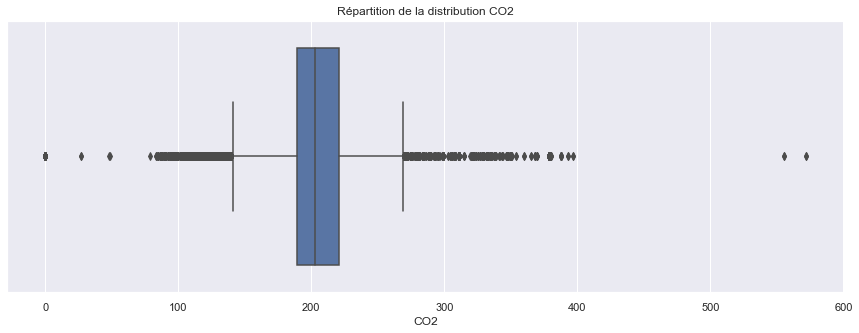

In [183]:
# Répartition de la distribution CO2:
plt.figure(figsize = (15, 5))
sns.boxplot(df_2013['CO2'])
plt.title('Répartition de la distribution CO2');

50% de la distribution est proche de 200 g/km. 
Peu de données pour des valeurs de CO2 inférieures à 189 g/km et supérieures à 221 g/km. 
La distribution est très étendue allant de 0 à 600 g/km

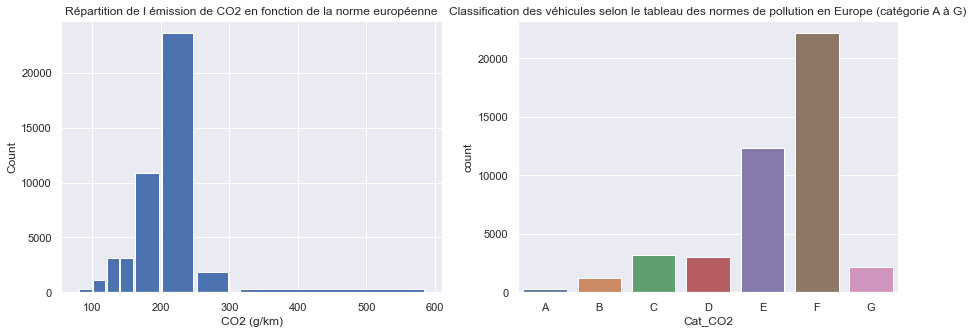

In [224]:
plt.figure(figsize = (15, 5))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:
# Pas encore réussi à utiliser les mêmes couleurs que la norme
plt.subplot(121)
plt.hist(df_2013['CO2'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne');

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):

plt.subplot(122)
sns.countplot(data = df_2013, x = 'Cat_CO2', order = ('A','B', 'C','D', 'E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)');



### 4.2 *Analyse des variables quantitatives*

In [112]:
# Import des packages pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme() # pour modifier le thème

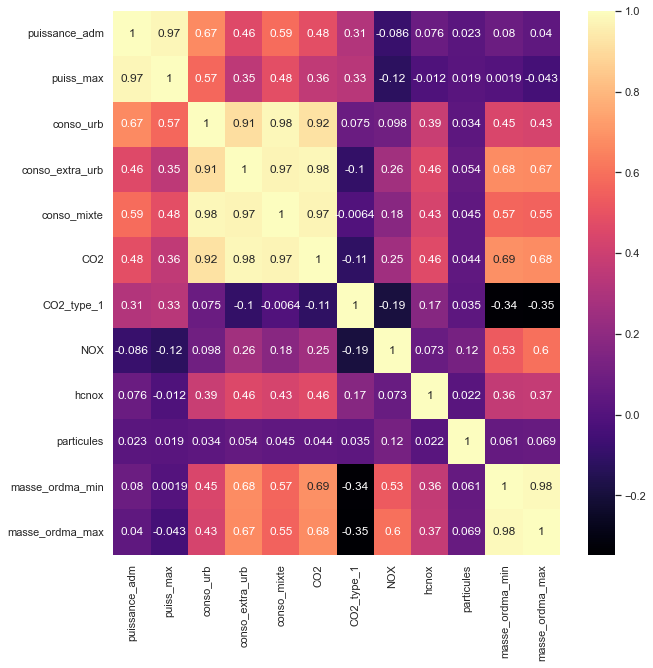

In [113]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_2013.corr(), annot = True, ax = ax, cmap = 'magma');

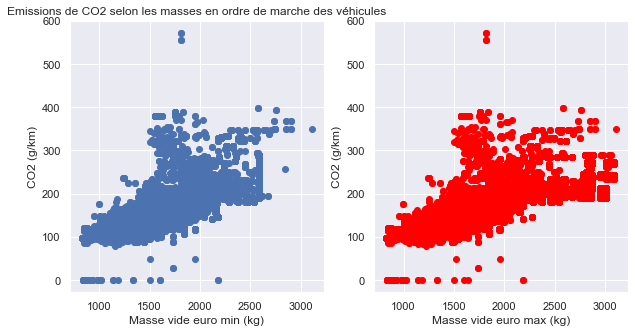

In [181]:
# On a vu que la masses en ordre de marche pouvaient avoir un lien avec la conso
# On va tenter de visualiser cela
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_2013['masse_ordma_min'], df_2013['CO2'])
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro min (kg)')
plt.title('Emissions de CO2 selon les masses en ordre de marche des véhicules')

plt.subplot(1, 2, 2)
plt.scatter(df_2013['masse_ordma_max'], df_2013['CO2'], color= 'red')
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro max (kg)');

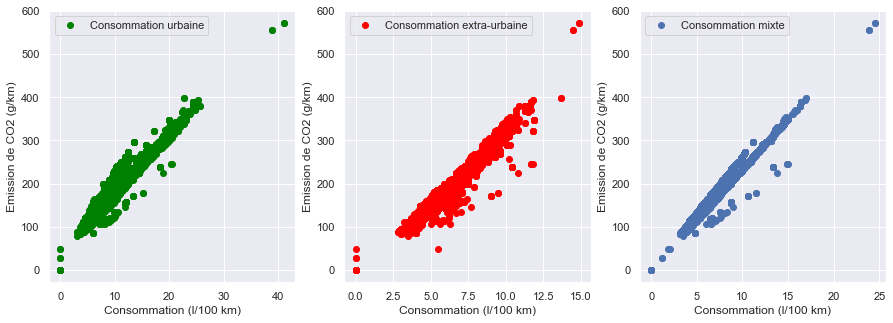

In [117]:
# Relation entre les consommations et les émissions en CO2
plt.figure(figsize = (15, 5))
plt.title('Relation entre les consommations et les émissions en CO2')
plt.subplot(1, 3, 1)
plt.scatter(df_2013['conso_urb'], df_2013['CO2'], label = 'Consommation urbaine', color = 'green')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df_2013['conso_extra_urb'], df_2013['CO2'], label = 'Consommation extra-urbaine', color = 'red')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_2013['conso_mixte'], df_2013['CO2'], label = 'Consommation mixte')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend();

Les graphes montrent une corrélation quasi-linéaire entre la consommation des véhicules et leurs niveaux d'émission en CO2

### 4.3 *Analyse des variables qualitatives*

Maintenant que la base est modifiée, on regarde les liens avec la variable à expliquer
On commence par supprimer les CO2 manquants pour les liens avec celle-ci

In [118]:
#on supprime les co2 manquants
df_2013=df_2013.dropna(subset=['CO2'])

df_2013.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marque           44231 non-null  object 
 1   modele_dossier   44231 non-null  object 
 2   modele_UTAC      44231 non-null  object 
 3   cat              44231 non-null  object 
 4   mq               44231 non-null  object 
 5   genre            44231 non-null  object 
 6   Carburant        44231 non-null  object 
 7   Hybride          44231 non-null  object 
 8   puissance_adm    44231 non-null  int64  
 9   puiss_max        44231 non-null  float64
 10  boite0           44231 non-null  object 
 11  conso_urb        44231 non-null  float64
 12  conso_extra_urb  44231 non-null  float64
 13  conso_mixte      44231 non-null  float64
 14  CO2              44231 non-null  float64
 15  CO2_type_1       44231 non-null  float64
 16  NOX              44231 non-null  float64
 17  hcnox       

In [119]:
#nombre de marques différentes
df_2013.Marque.value_counts().size

51

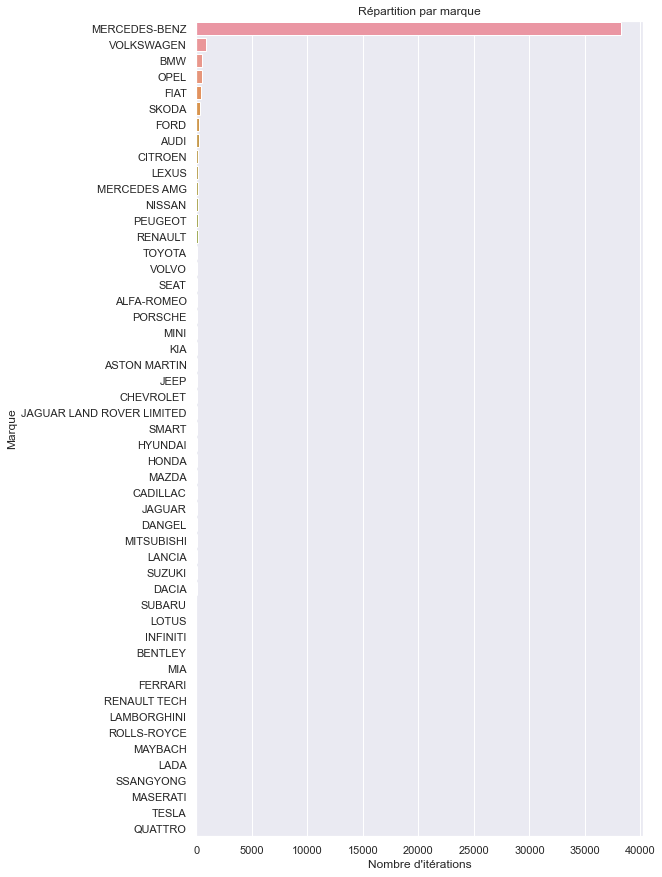

In [120]:
#d'abord on regarde les marques sans faire de filtre, c'est illisible:
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013,order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque');
#plot.set(xlim=(0, 1000))

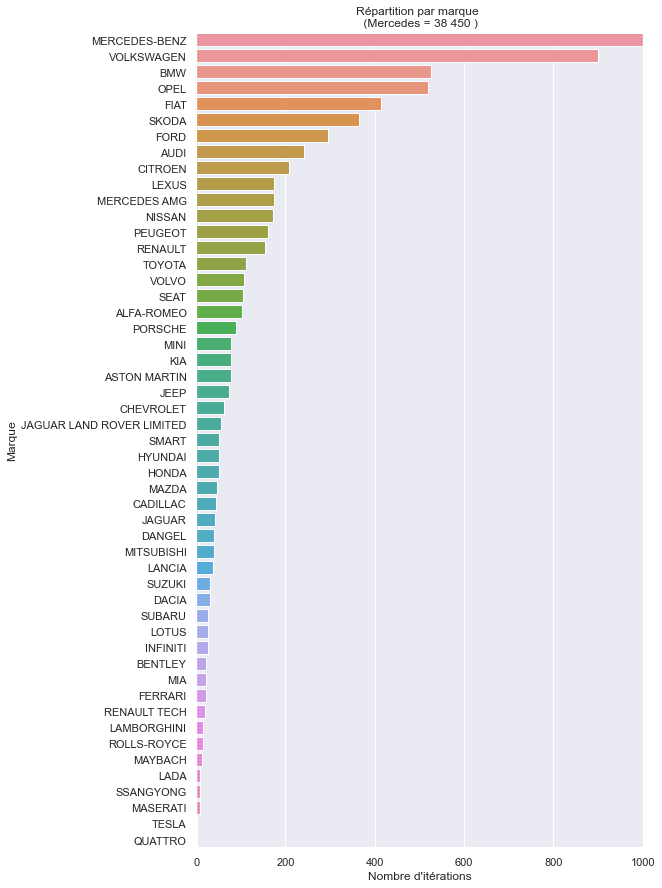

In [121]:
#donc on maximise le x
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013, order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n (Mercedes = 38 450 )')
plot.set(xlim=(0, 1000));

Répartition par modèle sur Mercedes pour comprendre

In [123]:
#nombre de modèles différents
df_2013.modele_dossier.value_counts().size

458

In [124]:
def graph_mod(marque_vehicule):
    table=df_2013[df_2013['Marque']==marque_vehicule]
    ax = plt.subplots(figsize=(12,8))
    plot=sns.countplot(y='modele_dossier',data=table,order = table.modele_dossier.value_counts().index)
    plot.set_xlabel("Nombre d'itérations")
    plot.set(title=marque_vehicule);    

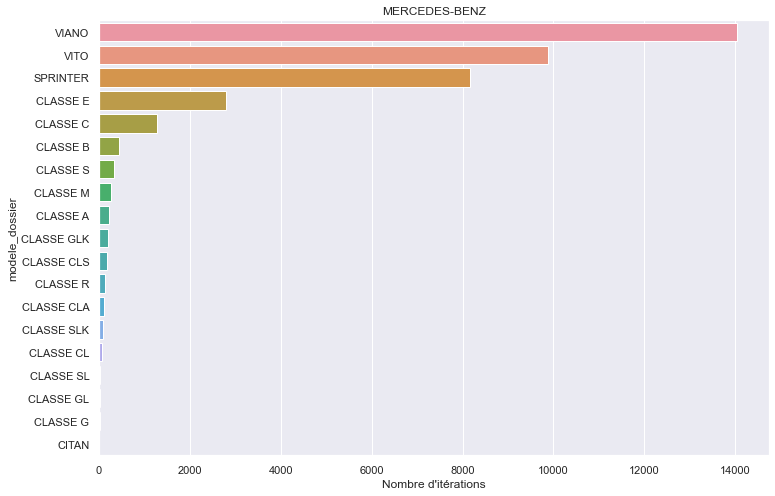

In [125]:
graph_mod('MERCEDES-BENZ')

In [129]:
import statsmodels.api

#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et la marque

,df,sum_sq,mean_sq,F,PR(>F)
Marque,50.0,1.935608e+07,387121.640940,361.969283,0.0
Residual,44180.0,4.724996e+07,1069.487548,NaN,NaN


In [130]:
#ANOVA modèles
result = statsmodels.formula.api.ols('CO2 ~ modele_dossier', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et la marque

,df,sum_sq,mean_sq,F,PR(>F)
modele_dossier,457.0,4.650650e+07,101764.780473,221.624492,0.0
Residual,43773.0,2.009954e+07,459.176598,NaN,NaN


Hybrides

C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


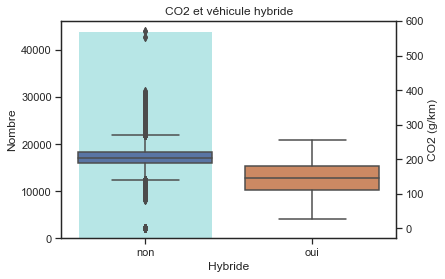

In [134]:
sns.set_style("ticks")


fig, ax = plt.subplots()

sns.countplot(df_2013.Hybride,color='paleturquoise',ax=ax)
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='Hybride',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et véhicule hybride')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [136]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Hybride', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Hybride,1.0,7.989100e+05,798910.012333,536.947743,4.406986e-118
Residual,44229.0,6.580713e+07,1487.872932,NaN,NaN


Gamme de véhicule (supérieure, luxe, inférieure, économique)

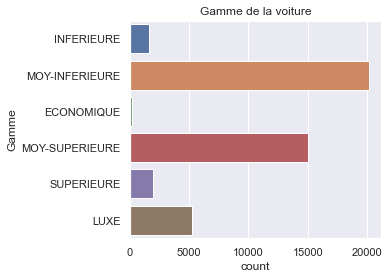

In [168]:
ordre=['INFERIEURE','MOY-INFERIEURE','ECONOMIQUE','MOY-SUPERIEURE','SUPERIEURE','LUXE']

plot_gamme=sns.countplot(y=df_2013.gamme2,order=ordre)
plot_gamme.set(title='Gamme de la voiture')
plt.ylabel('Gamme');

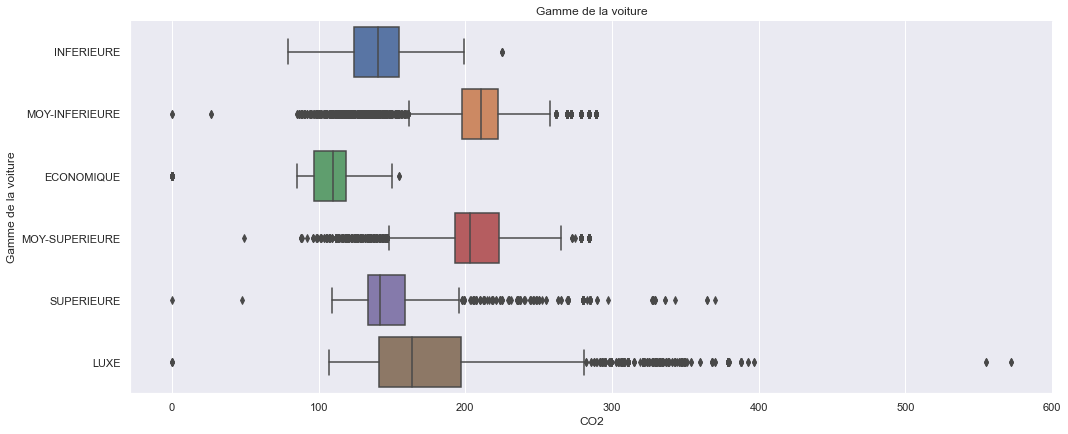

In [141]:
plot2=sns.catplot(y='gamme2',x='CO2',kind='box',data=df_2013, height=6, aspect=15/6,order=ordre);
plot2.set(title='Gamme de la voiture')
plot2.set(ylabel='Gamme de la voiture');

In [142]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
gamme2,5.0,1.674288e+07,3.348575e+06,2969.942763,0.0
Residual,44225.0,4.986317e+07,1.127488e+03,NaN,NaN


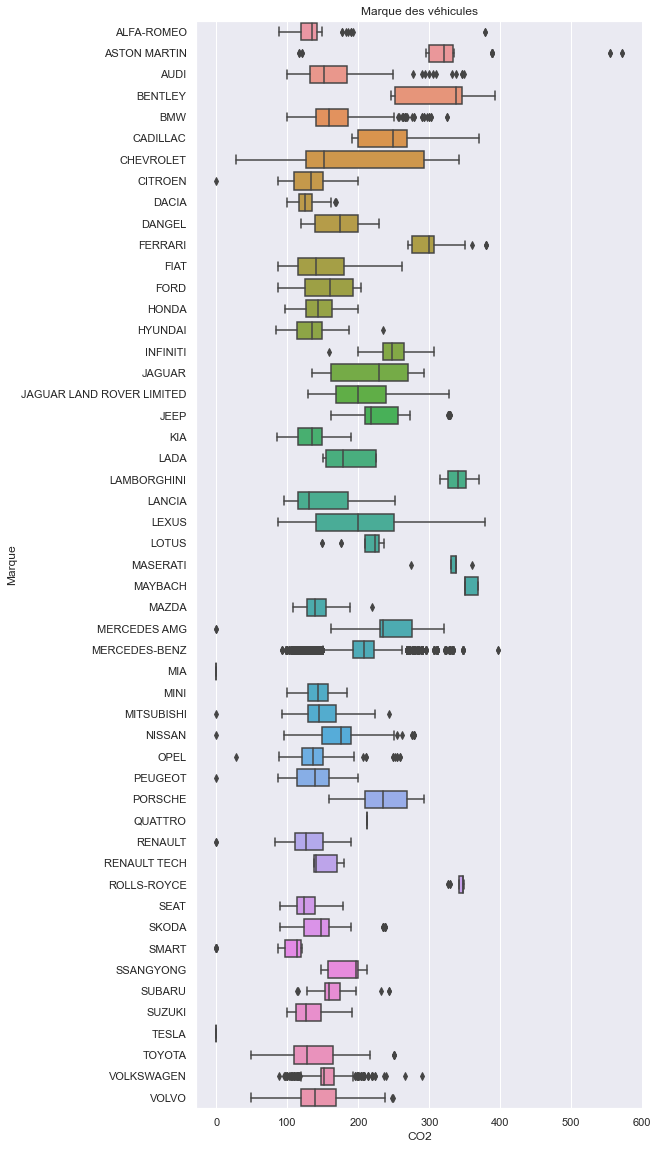

In [143]:
plt.figure(figsize = (8,20))
ax = sns.boxplot(y='Marque',x='CO2',data=df_2013)
ax.set(title='Marque des véhicules');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

Carburant

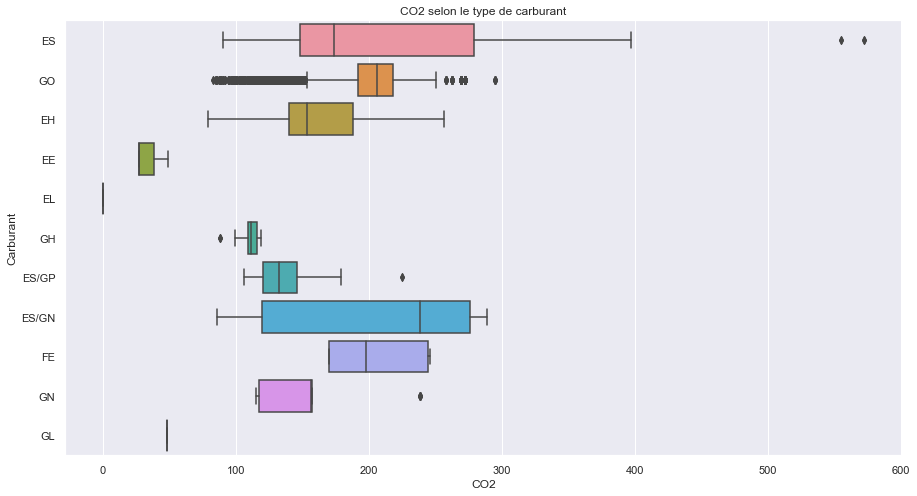

In [177]:

plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carburant',x='CO2',data=df_2013)
ax.set(title='CO2 selon le type de carburant');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [178]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carburant', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carburant,10.0,2.734602e+06,273460.231833,189.324235,0.0
Residual,44220.0,6.387144e+07,1444.401619,NaN,NaN


Carrosserie

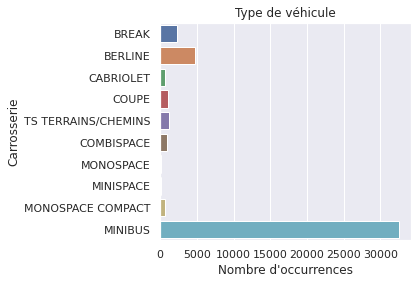

In [ ]:
plt.ylabel('Carrosserie')
plot_car2=sns.countplot(y=df_2013.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set(title='Type de véhicule');

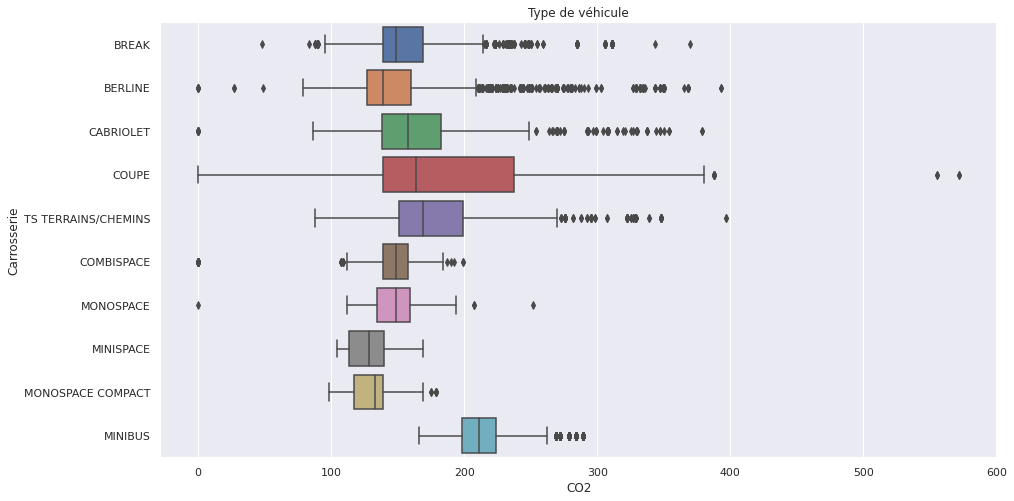

In [ ]:

plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carrosserie',x='CO2',data=df_2013)
ax.set(title='Type de véhicule');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [ ]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carrosserie,9.0,2.940006e+07,3.266674e+06,3882.590272,0.0
Residual,44221.0,3.720598e+07,8.413645e+02,NaN,NaN


Boîte

C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


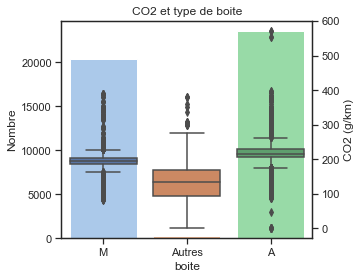

In [148]:
sns.set_style("ticks")

fig, ax = plt.subplots()

sns.countplot(df_2013.boite,ax=ax,palette='pastel')
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='boite',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et type de boite')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [149]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ boite', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
boite,2.0,7.948920e+06,3.974460e+06,2996.778648,0.0
Residual,44228.0,5.865712e+07,1.326244e+03,NaN,NaN


C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


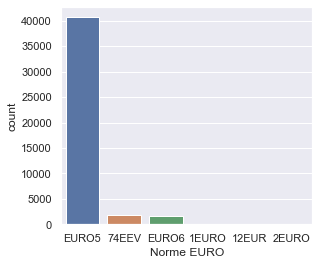

In [152]:
plot_norme=sns.countplot(df_2013['norme_EURO'], order = df_2013['norme_EURO'].value_counts().index)
plot_norme.set_xlabel("Norme EURO")
plot_hybride.set(title='Répartition des véhicules selon la norme EURO');
# Il y a une sur-représentation de véhicules avec la norme EURO5

## 5. Sélection des variables utiles

In [169]:
# On ne conserve que les variables qui vont être utiles pour la modélisation
# Les variables corrélées entre-elles sont aussi délaissées

df = df_2013.drop(columns = ['modele_dossier', 'modele_UTAC', 'design_comm', 'CNIT', "TVV", 'puissance_adm', 
                              'boite0', 'conso_extra_urb', 'conso_mixte', 'CO2_type_1', 'NOX', 
                              'particules','masse_ordma_max', 'champ_V9', 'date_maj','gamme'])

In [170]:
#on revérifie les doublons avec cette nouvelle base
# On checke les doublons
print('Il y a ', df.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df = df.drop_duplicates()
print('Maintenant, il y a ', df.duplicated().sum(), 'doublons dans le dataset')

Il y a  38769 doublons dans le dataset avant traitement
Maintenant, il y a  0 doublons dans le dataset


In [175]:
print("la taille de la base originale était de ",df_2013.shape,' elle est désormais de ',df.shape)

la taille de la base originale était de  (44231, 33)  elle est désormais de  (5462, 17)


La suppression de certaines variables a généré un nombre très important de doublons, la taille de la base est largement réduite maintenant, mais les données supprimées étaient redondantes

In [176]:
df.head()

,Marque,cat,mq,genre,Carburant,Hybride,puiss_max,conso_urb,CO2,hcnox,masse_ordma_min,Carrosserie,boite,rapport,norme_EURO,gamme2,Cat_CO2
0,ALFA-ROMEO,M10,ALF,VP,ES,non,147.0,11.3,182.0,0.225175,1505,BREAK,M,6,EURO5,MOY-SUPERIEURE,E
1,ALFA-ROMEO,M10,ALF,VP,GO,non,125.0,6.6,136.0,0.190000,1565,BERLINE,M,6,EURO5,MOY-SUPERIEURE,C
2,ALFA-ROMEO,M10,ALF,VP,GO,non,100.0,6.6,134.0,0.175000,1565,BERLINE,M,6,EURO5,MOY-SUPERIEURE,C
4,ALFA-ROMEO,M10,ALF,VP,GO,non,125.0,6.9,139.0,0.193000,1565,BERLINE,M,6,EURO5,MOY-SUPERIEURE,C
6,ALFA-ROMEO,M10,ALF,VP,ES,non,147.0,11.5,186.0,0.225175,1555,BREAK,M,6,EURO5,MOY-SUPERIEURE,E
